
## Data Visualization using Matplotlib



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Matplotlib and allow plots to show in the Jupyter Notebook
import matplotlib.pyplot as plt
%matplotlib inline
# Import NumPy and Pandas
import numpy as np
import pandas as pd

####**Question 1** : Load the given datasets using Pandas. Explore both datasets and merge them (Outer Join on Mouse ID). Check the merged dataset for any mouse ID with duplicate time points and remove the duplicate data associated with that mouse ID.

In [ ]:
a0=pd.read_csv("/content/drive/MyDrive/dcc/ Mouse_metadata.csv")
a1=pd.read_csv("/content/drive/MyDrive/dcc/ Study_results.csv")
ans = pd.merge(a0, a1, how='outer', on="Mouse ID")
ans1 = ans.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
# print(ans)
# print(ans1)
print('The cleaned dataset us given below:')
print()
ans1

The cleaned dataset us given below:



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


####**Question 2** : Explore the merged dataset. Display the shape of the merged dataset, and display the first and last 5 rows of the merged dataset (separately) using Pandas.

In [ ]:
shape = ans1.shape
print("The shape of the merged dataset is:",shape)
print("The shape of the cleaned merged dataset is smaller as compared to the meged one because there were some duplicate timepoint values for same emouse ID which were removed")
print()
print("The first five entries of the merged dataset are:")
print()
print(ans1.head())
print()
print("The last five entries of the merged dataset are:")
print()
print(ans1.tail())

The shape of the merged dataset is: (1888, 8)
The shape of the cleaned merged dataset is smaller as compared to the meged one because there were some duplicate timepoint values for same emouse ID which were removed

The first five entries of the merged dataset are:

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  

The last five entries of the merged dataset are:

     Mouse ID Drug Re

####**Question 3** : Generate a summary statistics table consisting of the mean, median, variance, and standard deviation, of the tumor volume for each drug regimen using Pandas.

In [ ]:
# Using group by method to calculate the  mean, median, variance, standard deviation, and mode of the tumor volume
mean = ans1['Tumor Volume (mm3)'].groupby(ans1['Drug Regimen']).mean()
median = ans1['Tumor Volume (mm3)'].groupby(ans1['Drug Regimen']).median()
var = ans1['Tumor Volume (mm3)'].groupby(ans1['Drug Regimen']).var()
std = ans1['Tumor Volume (mm3)'].groupby(ans1['Drug Regimen']).std()
mode = ans1['Tumor Volume (mm3)'].groupby(ans1['Drug Regimen']).agg(lambda x: x.mode().values[0])
# I have calculated teh mode as well because the starter file says that we have to find mode whereas the doc provided doesn't mention the calculation of mode
print('The summary statistics table is as follows:')
print()
ans3 = pd.DataFrame({"Mean ":mean,
                            "Median ":median,
                           "Variance":var,
                           "Standard deviation":std,
                           "Mode":mode})

ans3

The summary statistics table is as follows:



,Mean,Median,Variance,Standard deviation,Mode
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,45.0
Ceftamin,52.591172,51.776157,39.290177,6.268188,45.0
Infubinol,52.884795,51.820584,43.128684,6.567243,45.0
Ketapril,55.235638,53.698743,68.553577,8.279709,45.0
Naftisol,54.331565,52.509285,66.173479,8.134708,45.0
Placebo,54.033581,52.288934,61.168083,7.821003,45.0
Propriva,52.393463,50.909965,43.138803,6.568014,45.0
Ramicane,40.216745,40.673236,23.486704,4.846308,45.0
Stelasyn,54.233149,52.431737,59.450562,7.710419,45.0


####**Question 4** : Generate a bar plot using Matplotlib's pyplot that shows the number of total mice for each Drug regimen throughout the course of the study. Use different colors, styles, markers, and any visualization parameters.

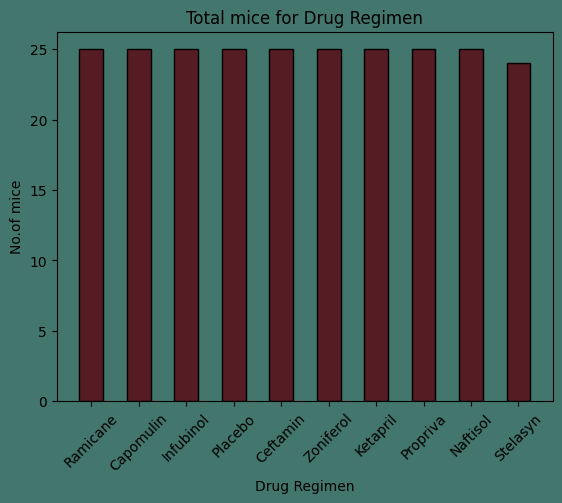

In [ ]:
a2 = ans1[['Mouse ID', 'Drug Regimen']].drop_duplicates()
y2 = a2["Drug Regimen"].value_counts()
plt.figure(facecolor="#43766c")
ax=plt.axes()
ax.set_facecolor("#43766c")
plt.bar(y2.index,y2,width=0.5,color="#561c24",edgecolor="black")
plt.title('Total mice for Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('No.of mice')
plt.xticks(rotation=45)
plt.show()

####**Question 5** : Generate a pie plot using Matplotlib's pyplot that shows the distribution of female and male mice in the study. Use different colors, styles, markers, and any visualization parameters.

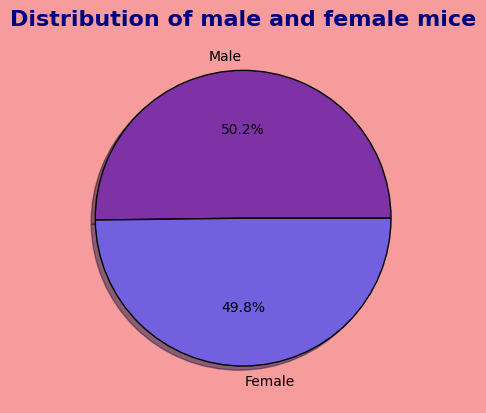

In [ ]:
a3 = ans1[['Mouse ID', 'Sex']].drop_duplicates()
y3 = a3["Sex"].value_counts()
x3 = a3["Sex"].unique()
colors = ['#7e32a6', '#7360DF']
plt.figure(facecolor="#f79c9c")
plt.pie(y3, labels = x3, autopct='%1.1f%%', colors=colors,shadow = True, wedgeprops={'edgecolor': 'black'},  )
plt.title('Distribution of male and female mice', fontsize=16, fontweight='bold', color='navy')
plt.show()

####**Question 6** : Determine the four treatment regimens with the most change in reduction (final - initial / intial) of tumor volume using Pandas.

In [ ]:
# function to sort the values
def bubble(a , n):
    if n==1:
        return a
    for i in range(0,n-1):
            if a[i][1] > a[i+1][1]:
                a[i],a[i+1] = a[i+1],a[i]
    return bubble(a,n-1)

# function to find change in tumor
def change(drug_df):
    drug_first = drug_df.groupby('Mouse ID').first()
    drug_last = drug_df.groupby('Mouse ID').last()
    ti = drug_first.iloc[:, 5].to_numpy()
    tf = drug_last.iloc[:, 5].to_numpy()
    change = (tf - ti) / ti
    return change.mean()

# Implementation

x = ans1['Drug Regimen'].unique()
# print(x)
res = []
for i in x:
    drug_df = ans1.loc[ans1["Drug Regimen"] == i,:]
    # print(drug_df)
    a = change(drug_df)
    # print(a)
    res.append((i , a))
# print(res)
resf = bubble(res , len(res))
print('The first four best drug regime are as follows:')
print()
for i in range (0,4):
    print(resf[i][0],resf[i][1])
print()
print('The negative sign indicates that the final tummor volume is less than the initial one thus showing that the drug is effective.')

The first four best drug regime are as follows:

Ramicane -0.1957468793688889
Capomulin -0.1851651617955556
Propriva 0.2608214137777778
Ceftamin 0.28342170722666665

The negative sign indicates that the final tummor volume is less than the initial one thus showing that the drug is effective.


####**Question 7** : Calculate the final tumor volume of each mouse across four treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR (interquartile range) and quantitatively determine if there are any potential outliers across all four treatment regimens using Pandas.

In [ ]:
# function to get the final tumor values and to calculate quartiles and iqr
def ftumor(drugdf):
    # getting the row with last timepoint for each mouse
    last = drugdf.groupby('Mouse ID').max()['Timepoint']
    # table for the finsl tumor volume
    merge = pd.merge(last, ans1, on=("Mouse ID","Timepoint"),how="left")
    final = merge["Tumor Volume (mm3)"]
    return final , merge

def calc(drugdf , drug):
    final , merge = ftumor(drugdf)
    print(f"The table showing final tumor volume of each mouse across {drug} treatment regimen is as follows")
    print()
    print(merge[['Mouse ID','Tumor Volume (mm3)','Weight (g)']])
    # finding the quartiles and iqr
    q = final.quantile([.25,.5,.75])
    q1 = q[0.25]
    q2 = q[0.5]
    q3 = q[0.75]
    iqr = q3 - q1

    print()
    print(f"The First quartile (q1) of {drug} tumors: {q1}")
    print(f"The Second quartile (q2) of {drug} tumors: {q2} ")
    print(f"The Third quartile (q3) of {drug} tumors: {q3}")
    print(f"The interquartile range (IQR = q3 - q1) of {drug} tumors: {iqr}")


    # calculating the lower bound and upper bound to determine outliers
    lb = q1 - (1.5 * iqr)
    ub = q3 + (1.5 * iqr)

    print(f"Values below {lb} could be outliers.")
    print(f"Values above {ub} could be outliers.")
 # implementation

capo = ans1.loc[ans1["Drug Regimen"] == "Capomulin",:]
rami = ans1.loc[ans1["Drug Regimen"] == "Ramicane", :]
infu = ans1.loc[ans1["Drug Regimen"] == "Infubinol", :]
ceft = ans1.loc[ans1["Drug Regimen"] == "Ceftamin", :]
# capo
calc(capo , "Capomulin")
print()
print()
calc(rami , "Ramicane")
print()
print()
calc(infu , "Infubinol")
print()
print()
calc(ceft , "Ceftamin")


The table showing final tumor volume of each mouse across Capomulin treatment regimen is as follows

   Mouse ID  Tumor Volume (mm3)  Weight (g)
0      b128           38.982878          22
1      b742           38.939633          21
2      f966           30.485985          17
3      g288           37.074024          19
4      g316           40.159220          22
5      i557           47.685963          24
6      i738           37.311846          20
7      j119           38.125164          23
8      j246           38.753265          21
9      l509           41.483008          21
10     l897           38.846876          19
11     m601           28.430964          17
12     m957           33.329098          19
13     r157           46.539206          25
14     r554           32.377357          17
15     r944           41.581521          25
16     s185           23.343598          17
17     s710           40.728578          23
18     t565           34.455298          17
19     u364        


####**Question 8** : Generate a box plot using Matplotlib's pyplot that shows the final tumor volume for the above four treatment regimens. Highlight any potential outliers in the plot by changing their color and style.



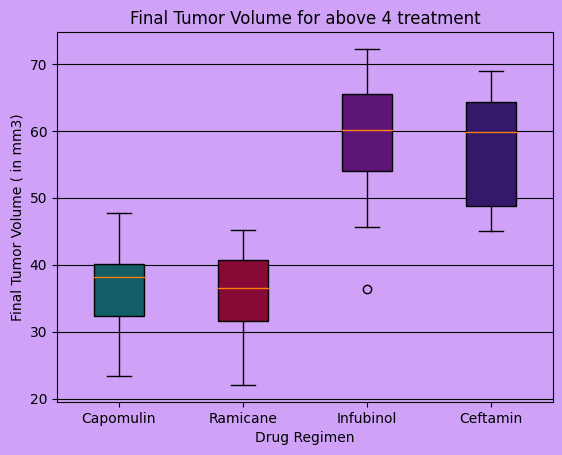

In [ ]:
final1 , merge1 = ftumor(capo)
final2 , merge2 = ftumor(rami)
final3 , merge3 = ftumor(infu)
final4 , merge4 = ftumor(ceft)

x = [final1, final2, final3, final4]
y = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
plt.figure(facecolor = "#d0a2f7")
ax = plt.axes()
ax.set_facecolor("#d0a2f7")
ax.yaxis.grid(True , color = 'black')
ax.set_title('Final Tumor Volume for above 4 treatment')
ax.set_ylabel('Final Tumor Volume ( in mm3)')
ax.set_xlabel('Drug Regimen')
plot = ax.boxplot(x, labels=y, widths = 0.4, vert=True, patch_artist = True)
bcolors = ['#135D66', '#860a35',  '#5E1675','#33186b' ]
for box, color in zip(plot['boxes'], bcolors):
    box.set_facecolor(color)
plt.show()


####**Question 9** : Generate a line plot using Matplotlib's pyplot that shows the tumor volume versus time point for a mouse that was treated with Capomulin. Use different colors, styles, markers, and any visualization parameters.

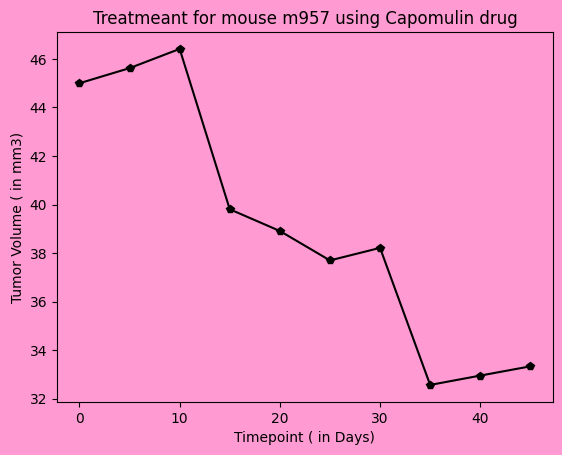

In [ ]:
specific_df = capo.loc[capo["Mouse ID"] == "m957",:]
# specific_df.head()
x4 = specific_df["Timepoint"]
y4 = specific_df["Tumor Volume (mm3)"]
plt.figure(facecolor = "#FF9BD2")
ax = plt.axes()
ax.set_facecolor("#FF9BD2")
plt.title('Treatmeant for mouse m957 using Capomulin drug')
plt.plot(x4, y4,marker="p",color="black", label="Fahreneit")
plt.xlabel('Timepoint ( in Days)')
plt.ylabel('Tumor Volume ( in mm3)')
plt.show()


#### **Question 10** : Generate a scatter plot using Matplotlib's pyplot that shows the mouse weight versus average tumor volume for the Capomulin treatment regimen. Use different colors, styles, markers, and any visualization parameters.

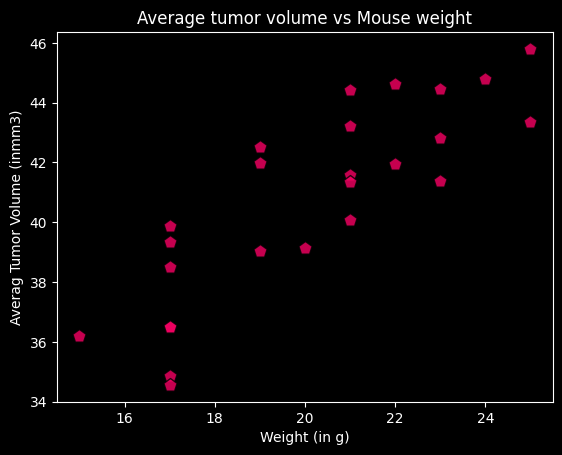


The above graph show average tumor volume vs mouse weight
However the question mentions the plot to be mouse weight vs average tumor volume
This is done because mouse weight is an independent quantity where as tumor volume may be dependent.


In [ ]:
new_df = capo.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index()
x5 = new_df['Weight (g)']
y5 = new_df['Tumor Volume (mm3)']
plt.figure(facecolor="#000000")
ax = plt.axes()
ax.set_facecolor("#000000")
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.scatter(x5,y5,color="#f80164",edgecolor="black",alpha = 0.8,s = 100, marker = 'p')
plt.title('Average tumor volume vs Mouse weight',color="white")
plt.xlabel('Weight (in g)',color="white")
plt.ylabel('Averag Tumor Volume (inmm3)',color="white")
plt.show()
print()
print('The above graph show average tumor volume vs mouse weight')
print('However the question mentions the plot to be mouse weight vs average tumor volume')
print('This is done because mouse weight is an independent quantity where as tumor volume may be dependent.')